# Model for Sample I: Wine and Whiskey

-------------


# Introduction

---------

This pipeline takes the data that was generated from the last notebook. The data had to be saved into an np array and saved. The X file, which are the images is quite large, almost 3GB, where the y-s were shorter. Because of issues with the categorical method when they were exported, I needed to reupload the y-values (which are in the y_fixed methods).

The model I was using was a Convoluted Neural Network. I ran two different versions of the model. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

import tensorflow as tf

import time
import threading

import numpy as np

Using TensorFlow backend.


## Importing Data and Restructuring to load into Keras CNN Model

--------

I picked the category ID's for the items I was looking to classify. These were explored in the EDA notebook. I then encoded the targets to simplify. 

In [2]:
targets = [1000003437, 1000003407, 1000003400, 1000003404, 1000003402]
label_encoder = LabelEncoder()
label_encoder.fit(targets)

LabelEncoder()

These are the files to import the data created in the other notebook. This drastically helped reduce the time it took to compute. Now instead of having to run my parsing method for two to three hours, I was able tot quickly upload these large files as np.arrays to load into the CNN model. I then checked the shapes to verify the correct models were selected and could be used

In [3]:
with open('wine_Xtrain.npy', 'rb') as np_in:
    Xread= np.load(np_in)

In [4]:
Xread.shape

(6660, 180, 180, 3)

In [5]:
with open('wine_final_ytrain.npy', 'rb') as np_yin:
    Yread= np.load(np_yin)

In [6]:
Yread.shape

(6660,)

In [7]:
Yread_en = label_encoder.transform(Yread)

In [8]:
X = Xread
y= Yread_en

In [9]:
y.shape

(6660,)

## Test Train Split

-----


In [11]:
# Update the train-test-split size 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

X_train = X_train.reshape(X_train.shape[0], 180, 180, 3)
X_test = X_test.reshape(X_test.shape[0], 180, 180, 3)



## First Model 

---------

This model is my first model. I sought to have a "simple" topology to test a neural net. Given the size of of dataset, even the reduced size of 7916 images each were run through 914,005 parameters during the testing. As such the modely typically took 5 minutes per epoch. 

In [16]:
y.shape

(6660,)

In [19]:
# Model_1

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

ValueError: Error when checking target: expected dense_10 to have shape (None, 5) but got array with shape (4995, 1)

In [75]:
keras.callbacks.History()

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 176, 176, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 85, 85, 16)        8208      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                903200    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total para

The following two graphs show the relationship between the accuracy of the model and the loss between the training and testing data. This is a good way to see if the model is over fitting and how well it is at reducing the loss. 

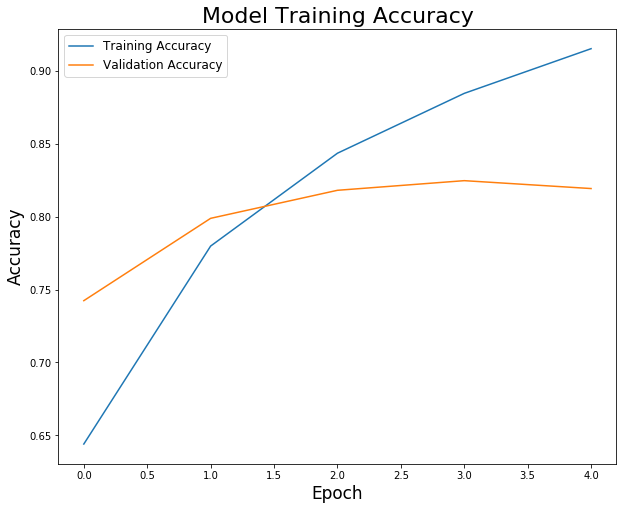

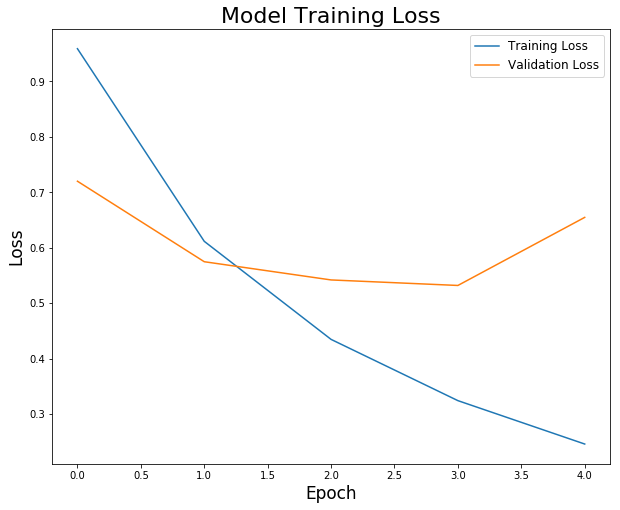

In [77]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

Here are the graphs from before updated to incorporate the new data from the test set. Technically this could have been introduced earlier because of how networks learn over multiple epochs, however brining in the data in steps added an extra step of cross validation. 

## Import Testing Data


In [78]:
# Import the Testing Data
with open('wine_Xtest.npy', 'rb') as np_in_test:
    Xt_in= np.load(np_in_test)


In [79]:
Xt_in.shape

(1256, 180, 180, 3)

In [80]:
with open('wine_final_ytest.npy', 'rb') as np_in_ytest_fixed:
    yt_fixed = np.load(np_in_ytest_fixed)

In [81]:
yt_fixed

array([1000003437, 1000003437, 1000003402, ..., 1000003400, 1000003402,
       1000003400])

In [82]:
yt_fixed.shape

(1256,)

In [83]:
yt_en = label_encoder.transform(yt_fixed)

In [84]:
yt_en

array([4, 4, 1, ..., 0, 1, 0])

In [85]:
yt_cats = to_categorical(yt_en)

In [86]:
yt_cats

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [87]:
yt_cats.shape

(1256, 5)

In [91]:
Xt = Xt_in


In [92]:
Xt.shape

(1256, 180, 180, 3)

Fitting First model with whole dataset and running 5 more epochs. 

In [95]:
model.fit(X, y_cat, validation_data=(Xt, yt_cats), epochs=5)

Train on 6660 samples, validate on 1256 samples
Epoch 1/5
6660/6660 [==============================] - 284s 43ms/step - loss: 0.2967 - acc: 0.9020 - val_loss: 0.5330 - val_acc: 0.8320
Epoch 2/5
6660/6660 [==============================] - 248s 37ms/step - loss: 0.1999 - acc: 0.9362 - val_loss: 0.5115 - val_acc: 0.8392
Epoch 3/5
6660/6660 [==============================] - 245s 37ms/step - loss: 0.1404 - acc: 0.9535 - val_loss: 0.6399 - val_acc: 0.8439
Epoch 4/5
6660/6660 [==============================] - 258s 39ms/step - loss: 0.1059 - acc: 0.9656 - val_loss: 0.7425 - val_acc: 0.8368
Epoch 5/5
6660/6660 [==============================] - 249s 37ms/step - loss: 0.1034 - acc: 0.9650 - val_loss: 0.7864 - val_acc: 0.8408


These are the same plots from earlier comparing the loss and accuracy, but with the updated history from running the model. 

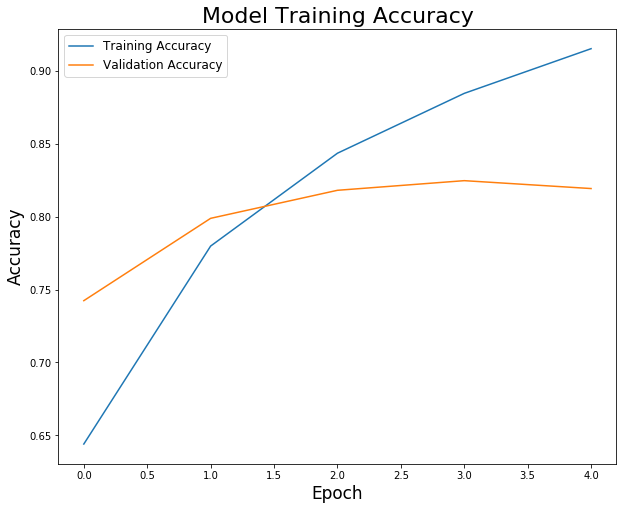

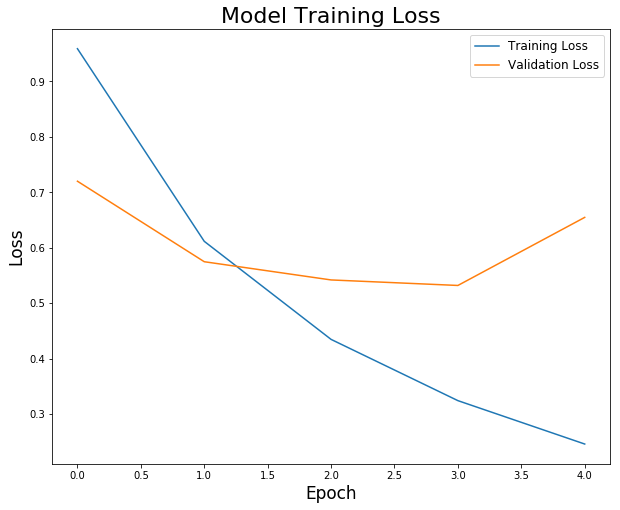

In [105]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Predictions 

--------

Now building predictions off of hte data to see how we can predict the y-values

In [96]:
model_1_preds = model.predict_classes(Xt, 32, verbose=1)

1256/1256 [==============================] - 20s 16ms/step


In [106]:
# Build Confusion Matrix
# confusion_matrix(yt_cats, model_1_preds)

## Second Model

For this step I created a second model with an extra level of complexity. I experimented with a topology using multiples of 16 and then had each level grow as it went up 



In [101]:
# Import Model II Stuff 

model2 = Sequential()
model2.add(Conv2D(16, (2, 2), input_shape=(180, 180, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(32, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(y_cat.shape[1], activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 4995 samples, validate on 1665 samples
Epoch 1/5
4995/4995 [==============================] - 159s 32ms/step - loss: 0.8260 - acc: 0.7095 - val_loss: 0.6176 - val_acc: 0.7838
Epoch 2/5
4995/4995 [==============================] - 137s 27ms/step - loss: 0.5376 - acc: 0.8156 - val_loss: 0.5993 - val_acc: 0.7832
Epoch 3/5
4995/4995 [==============================] - 134s 27ms/step - loss: 0.4232 - acc: 0.8581 - val_loss: 0.4888 - val_acc: 0.8474
Epoch 4/5
4995/4995 [==============================] - 3729s 747ms/step - loss: 0.3578 - acc: 0.8811 - val_loss: 0.4758 - val_acc: 0.8474
Epoch 5/5
4995/4995 [==============================] - 512s 103ms/step - loss: 0.2818 - acc: 0.9055 - val_loss: 0.5034 - val_acc: 0.8553


In [102]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 179, 179, 16)      208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 86, 86, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 40, 40, 64)        32832     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 25600)             0         
__________

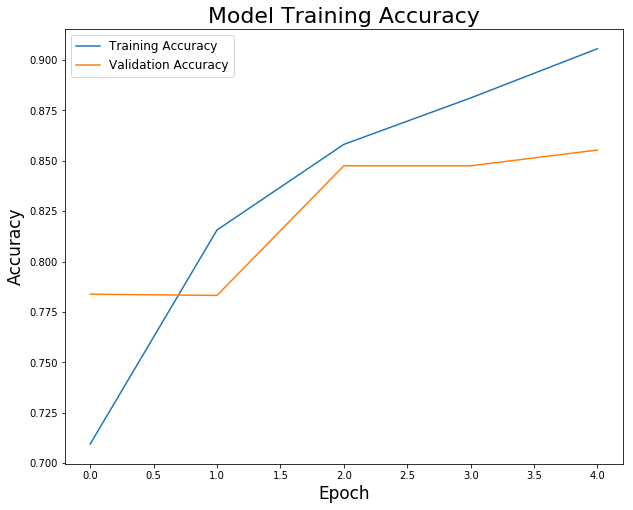

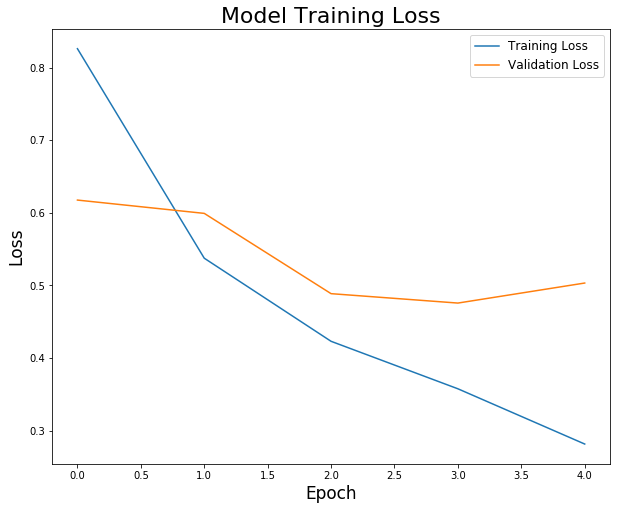

In [104]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

Running the second model with the full data set 

In [103]:
model2.fit(X, y_cat, validation_data=(Xt, yt_cats), epochs=5)

Train on 6660 samples, validate on 1256 samples
Epoch 1/5
6660/6660 [==============================] - 205s 31ms/step - loss: 0.3100 - acc: 0.8997 - val_loss: 0.4680 - val_acc: 0.8503
Epoch 2/5
6660/6660 [==============================] - 177s 27ms/step - loss: 0.2202 - acc: 0.9254 - val_loss: 0.4499 - val_acc: 0.8615
Epoch 3/5
6660/6660 [==============================] - 179s 27ms/step - loss: 0.1676 - acc: 0.9464 - val_loss: 0.5560 - val_acc: 0.8599
Epoch 4/5
6660/6660 [==============================] - 179s 27ms/step - loss: 0.1334 - acc: 0.9557 - val_loss: 0.5386 - val_acc: 0.8639
Epoch 5/5
6660/6660 [==============================] - 178s 27ms/step - loss: 0.1133 - acc: 0.9623 - val_loss: 0.5528 - val_acc: 0.8694


Updated Graphs after the final run of the second model. 

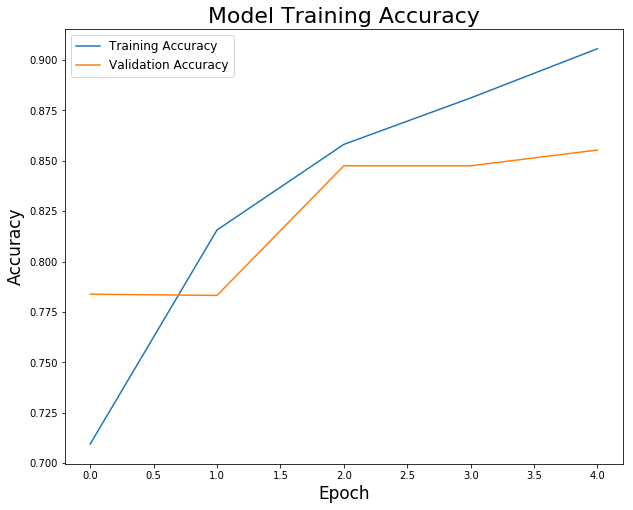

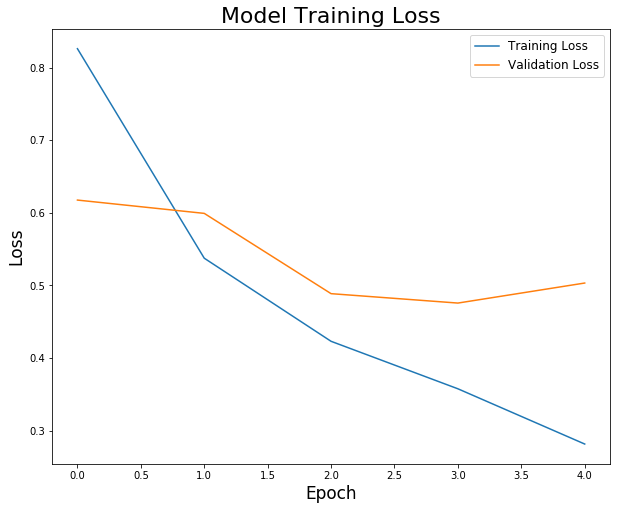

In [107]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

In [ ]:
#Build predictions
model_2_preds = model2.predict_classes(Xt, 32, verbose=1)